# Acessing the stored RVs

/home/amiguel/phd/tools/sBART_private/.venv/lib/python3.8/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/home/amiguel/phd/tools/sBART_private/.venv/lib/python3.8/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


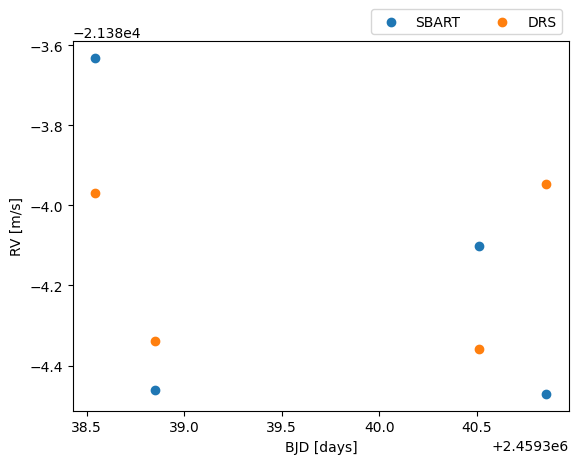

In [1]:
import os 
os.environ["NO_GRAPHICAL_BACKEND"] = "False"

import matplotlib.pyplot as plt 
from SBART.outside_tools.Load_RVoutputs import find_RVoutputs
from SBART.utils.units import meter_second
from pathlib import Path 

out_path = "/home/amiguel/phd/tools/sBART_private/tests/documentation_outputs/Iteration_0/RV_step"

data_holder = find_RVoutputs(out_path)
insts = data_holder.get_stored_subInsts(merged=False)

fig, axis = plt.subplots(len(insts))
for inst_index, inst in enumerate(insts):
    cube = data_holder.get_RV_cube(inst, merged=False)

    for key in ["SBART", "DRS"]:
        bjds, rvs, errors = cube.get_RV_timeseries(key,
                                                apply_SA_corr=False,
                                                as_value=True,
                                                units=meter_second
                                                )
    
        axis.scatter(bjds, rvs, label=key)

axis.legend(ncol=2, loc=4, bbox_to_anchor=(1,1))
axis.set_xlabel("BJD [days]")
axis.set_ylabel("RV [m/s]")

plt.show()